## Conversational Text Data

### Shulun Chen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
train = pd.read_csv('jigsaw-unintended-bias-in-toxicity-classification/train.csv')
test = pd.read_csv('jigsaw-unintended-bias-in-toxicity-classification/test.csv')
sub = pd.read_csv('jigsaw-unintended-bias-in-toxicity-classification/sample_submission.csv')

In [2]:
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


#### Engineer more features

In [3]:
train.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [4]:
train['total_length'] = train['comment_text'].apply(len)
train['capitals'] = train['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
train['caps_vs_length'] = train.apply(lambda row: float(row['capitals'])/float(row['total_length']),axis=1)
train['num_exclamation_marks'] = train['comment_text'].apply(lambda comment: comment.count('!'))
train['num_question_marks'] = train['comment_text'].apply(lambda comment: comment.count('?'))
train['num_punctuation'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '.,;:'))
train['num_symbols'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))
train['num_words'] = train['comment_text'].apply(lambda comment: len(comment.split()))
train['num_unique_words'] = train['comment_text'].apply(lambda comment: len(set(w for w in comment.split())))
train['words_vs_unique'] = train['num_unique_words'] / train['num_words']
train['num_smilies'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [5]:
features = ('total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks','num_question_marks', 'num_punctuation', 'num_words', 'num_unique_words','words_vs_unique', 'num_smilies', 'num_symbols')
columns = ('target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit','identity_annotator_count', 'toxicity_annotator_count')
rows = [{c:train[f].corr(train[c]) for c in columns} for f in features]
train_correlations = pd.DataFrame(rows, index=features)

In [6]:
train_correlations

,disagree,funny,identity_annotator_count,identity_attack,insult,likes,obscene,sad,severe_toxicity,sexual_explicit,target,threat,toxicity_annotator_count,wow
total_length,0.017617,-0.084710,0.020840,0.053430,0.009085,0.060639,0.009823,-0.019940,0.007962,0.019882,0.006444,-0.013198,-0.030894,0.002572
capitals,0.003928,-0.039221,0.012405,0.050489,0.026358,0.018707,0.027995,-0.005448,0.025127,0.014144,0.026120,0.000721,-0.009082,0.009687
caps_vs_length,-0.021716,0.021263,-0.005510,-0.008477,-0.006029,-0.038470,0.017088,0.002848,0.010594,-0.003575,-0.005344,0.000822,0.015381,-0.000603
num_exclamation_marks,-0.009384,0.007073,0.000869,0.017085,0.052533,-0.007866,0.056108,0.005158,0.035388,0.019437,0.055152,0.021267,0.024115,0.002225
num_question_marks,-0.002180,-0.009290,0.006305,0.028554,0.014366,-0.002731,0.019233,0.002023,0.011662,0.015987,0.019308,-0.000430,-0.003307,0.001263
num_punctuation,0.001415,-0.057187,0.018050,0.042990,0.018911,0.029581,0.017701,-0.016511,0.013266,0.018985,0.016974,-0.006479,-0.021231,0.001959
num_words,0.016121,-0.084398,0.020595,0.050527,0.011975,0.059481,0.014536,-0.019412,0.009696,0.021525,0.009579,-0.009893,-0.029856,0.002714
num_unique_words,0.019634,-0.085764,0.020787,0.053659,0.019494,0.063874,0.017918,-0.018110,0.011900,0.022816,0.016702,-0.008946,-0.029814,0.003490
words_vs_unique,-0.020712,0.079045,-0.019749,-0.048941,0.001135,-0.060162,-0.003007,0.016223,-0.005329,-0.015748,0.001172,0.009367,0.027853,-0.004150
num_smilies,-0.010936,0.010109,-0.000576,-0.008337,-0.009401,-0.016607,-0.001024,-0.002133,-0.003877,-0.000414,-0.010040,-0.003190,-0.003030,-0.002777


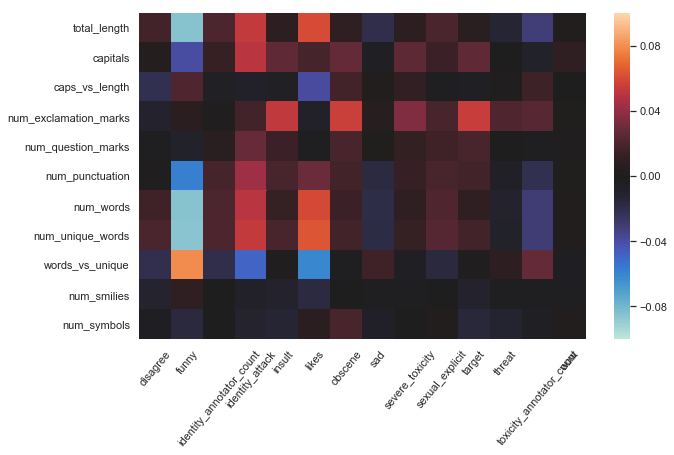

In [26]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1)
ax = sns.heatmap(train_correlations, vmin=-0.1, vmax=0.1, center=0.0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
plt.show()

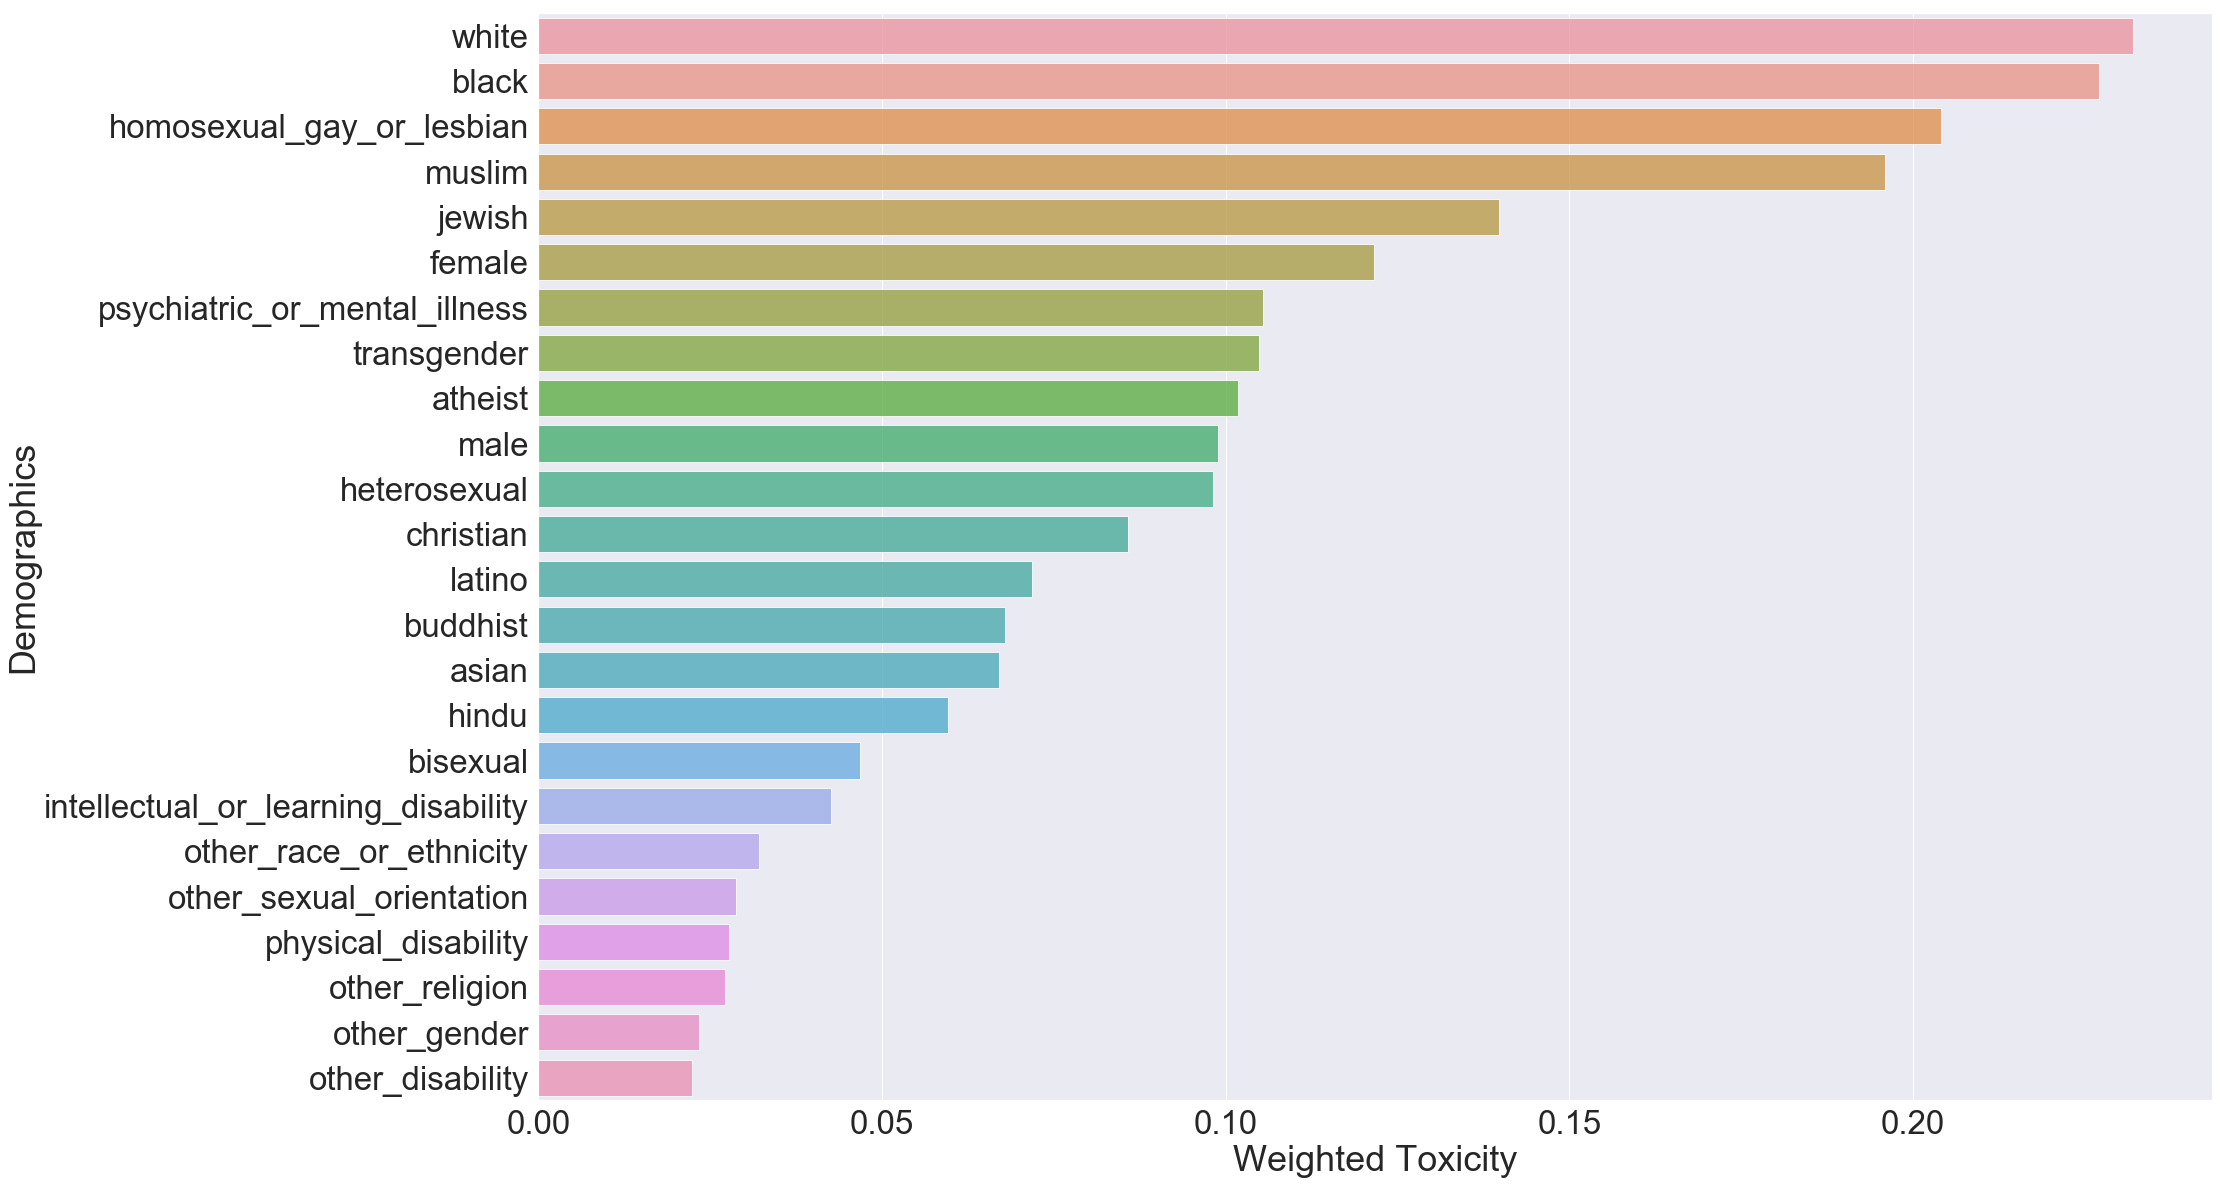

In [23]:
demographics = train.loc[:, ['target']+list(train)[slice(8,32)]].dropna()
weighted_toxic = demographics.iloc[:, 1:].multiply(demographics.iloc[:, 0], axis="index").sum()/demographics.iloc[:, 1:][demographics.iloc[:, 1:]>0].count()
weighted_toxic = weighted_toxic.sort_values(ascending=False)
plt.figure(figsize=(30,20))
sns.set(font_scale=3)
ax = sns.barplot(x = weighted_toxic.values, y = weighted_toxic.index, alpha=0.8)
plt.ylabel('Demographics')
plt.xlabel('Weighted Toxicity')
plt.show()

Here I have a simple barplot of the text toxicity across different demographics. I also have a correlation heatmap of feature columns versus aggregated features of the texts. From the plot above one could clearly identify the demographics of the sources of toxic texts. Also, the correlation map demonstrates that multicollinearity is fairly small and we could safely use those newly engineered features to build an improved model. Next, I will dive deeper into this dataset, visualize it more and hopefully that I could generate more insights from my plots to help me build a better model for making more accurate predictions.

In [9]:
identities = tuple(train.iloc[:, 8:32])
rows = [{c:train[f].corr(train[c]) for c in columns} for f in identities]
poptoxicity_correlations = pd.DataFrame(rows, index=identities)

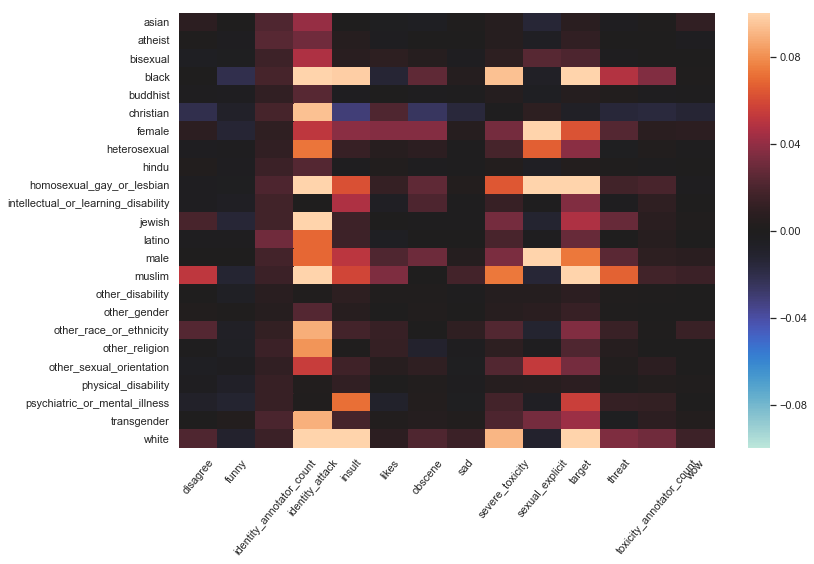

In [25]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
ax = sns.heatmap(poptoxicity_correlations, vmin=-0.1, vmax=0.1, center=0.0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
plt.show()

Check the time series for toxicity with different identities:

In [32]:
withdate = train.loc[:, ['created_date', 'target']+list(train)[slice(8, 32)]].dropna()
raceweighted = withdate.iloc[:, 2:] / withdate.iloc[:, 2:].sum()
race_target_weighted = raceweighted.multiply(withdate.iloc[:, 1], axis='index')
race_target_weighted['created_date'] = pd.to_datetime(withdate['created_date']).values.astype('datetime64[M]')
weighted_demo = race_target_weighted.groupby(['created_date']).sum().sort_index()

In [10]:
import plotly
import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='robotc142', api_key='X6V11ouNb3SqfMdeG41U')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [33]:
weighted_demo[['white', 'asian', 'black', 'jewish', 'latino', 'other_race_or_ethnicity']] \
    .iplot(title='Time Series Toxicity & Race', yTitle='Toxicity', xTitle='Timeline', filename='Time Series Toxicity & Race')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [34]:
weighted_demo[['atheist', 'buddhist', 'christian', 'hindu', 'muslim', 'other_religion']] \
    .iplot(title='Time Series Toxicity & Religion', yTitle='Toxicity', xTitle='Timeline', filename='Time Series Toxicity & Religion')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [52]:
weighted_demo[['heterosexual', 'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation']] \
    .iplot(title='Time Series Toxicity & Sexual Orientation', yTitle='Toxicity', filename='Time Series Toxicity & Sexual Orientation')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



It is not hard to notice that the toxicity of texts is generally higher in 2017 than 2016 across all three major categories: race, religion and sexual orientation. 

In [7]:
alldate_toxicity = train[train['target'] >= 0.5].loc[:, ['created_date', 'target', 'comment_text']].dropna()
alldate_toxicity['created_date'] = pd.to_datetime(alldate_toxicity['created_date']).values.astype('datetime64[M]')
jan_2017_toxicity = alldate_toxicity[alldate_toxicity['created_date'] == '2017-01-01']

from nltk.corpus import stopwords
def check_frequency(data = alldate_toxicity['comment_text'], n = 20):
    stop = stopwords.words('english')
    data  = data.apply(lambda x: " ".join(x.lower() for x in x.split()))
    data = data.str.replace('[^\w\s]','')
    data = data.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    freq = pd.Series(' '.join(data).split()).value_counts()[:n]
    return freq

top_10_toxicity_othertime = check_frequency(data = alldate_toxicity[alldate_toxicity['created_date'] != '2017-01-01']['comment_text'], n = 10)
top_10_toxicity_jan_2017 = check_frequency(data = jan_2017_toxicity['comment_text'], n = 10)

In [8]:
percent_toxicity_othertime = top_10_toxicity_othertime/alldate_toxicity[alldate_toxicity['created_date'] != '2017-01-01']['comment_text'].str.split().str.len().sum()
percent_toxicity_jan_2017 = top_10_toxicity_jan_2017/jan_2017_toxicity['comment_text'].str.split().str.len().sum()
top_toxicity = pd.concat([percent_toxicity_jan_2017, percent_toxicity_othertime], axis=1, sort=False)
top_toxicity.columns = ['Jan_2017', 'Other_Time']
top_toxicity['Difference'] = top_toxicity['Jan_2017'] - top_toxicity['Other_Time']

In [11]:
import plotly.graph_objs as go
trace1 = go.Bar(
    x=top_toxicity.index,
    y=top_toxicity['Jan_2017'],
    name='Jan_2017'
)
trace2 = go.Bar(
    x=top_toxicity.index,
    y=top_toxicity['Other_Time'],
    name='Other_Time'
)

data = [trace2, trace1]
layout = go.Layout(
    barmode='group',
    xaxis=dict(
        title='Words'
    ),
    yaxis=dict(
        title='Percent of Toxicity'
    )
)
layout = go.Layout(yaxis=dict(tickformat=".2%"))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, title='Top Toxicity Comarision', filename='top_toxicity_comarision')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [12]:
train['datetime64'] = pd.to_datetime(train['created_date']).values.astype('datetime64[h]')
train['hour'] = train['datetime64'].dt.hour
all_comments_by_hour = train['target'].groupby(train['hour']).sum().sort_index()/train['target'].groupby(train['hour']).sum().sum()
toxic_comments_by_hour = train[train['target'] >= 0.5]['target'].groupby(train['hour']).sum().sort_index()/train[train['target'] >= 0.5]['target'].groupby(train['hour']).sum().sum()
comments_hour_check = pd.concat([all_comments_by_hour, toxic_comments_by_hour], axis=1, sort=False)
comments_hour_check.columns = ['all_comments', 'toxic_comments']

In [13]:
labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Midnight']
tickvals = ['0', '6', '12', '18', comments_hour_check.index.max()]

trace1 = go.Scatter(
    x=comments_hour_check.index,
    y=comments_hour_check['all_comments'],
    name = 'comment percent per hour',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 1)
)
trace2 = go.Scatter(
    x=comments_hour_check.index,
    y=comments_hour_check['toxic_comments'],
    name = 'toxic comment percent per hour',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 1,)
)

trace3 = go.Bar(
    x=comments_hour_check.index,
    y=comments_hour_check['toxic_comments']-comments_hour_check['all_comments'],
    name = 'More Toxic Comment Ratio'
)

data = [trace1, trace2, trace3]

layout = go.Layout(yaxis=dict(tickformat=".2%", title='Percentage'),
                   title = 'Which Time are People More Toxic',
                   xaxis=go.layout.XAxis(
                       title='Time',
                       ticktext=labels, 
                       tickvals=tickvals
                   )
                  )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Which Time are People More Toxic')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [59]:
trace1 = go.Scatter(
    x=comments_hour_check.index,
    y=comments_hour_check['all_comments'],
    name = 'comment percent per hour',
    mode='markers',
    marker=dict(
        size=comments_hour_check['all_comments']*400,
    )
)

trace2 = go.Scatter(
    x=comments_hour_check.index,
    y=comments_hour_check['toxic_comments'],
    name = 'comment percent per hour',
    mode='markers',
    marker=dict(
        size=comments_hour_check['toxic_comments']*400,
    )
)

trace3 = go.Bar(
    x=comments_hour_check.index,
    y=comments_hour_check['toxic_comments']-comments_hour_check['all_comments'],
    name = 'More Toxic Comment Ratio'
)

layout = go.Layout(yaxis=dict(tickformat=".2%", title='Percentage'),
                   title = 'Which Time are People More Toxic',
                   xaxis=go.layout.XAxis(
                       title='Time',
                       ticktext=labels, 
                       tickvals=tickvals
                   )
                  )
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
py.iplot(fig, filename='Which Time are People More Toxic')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



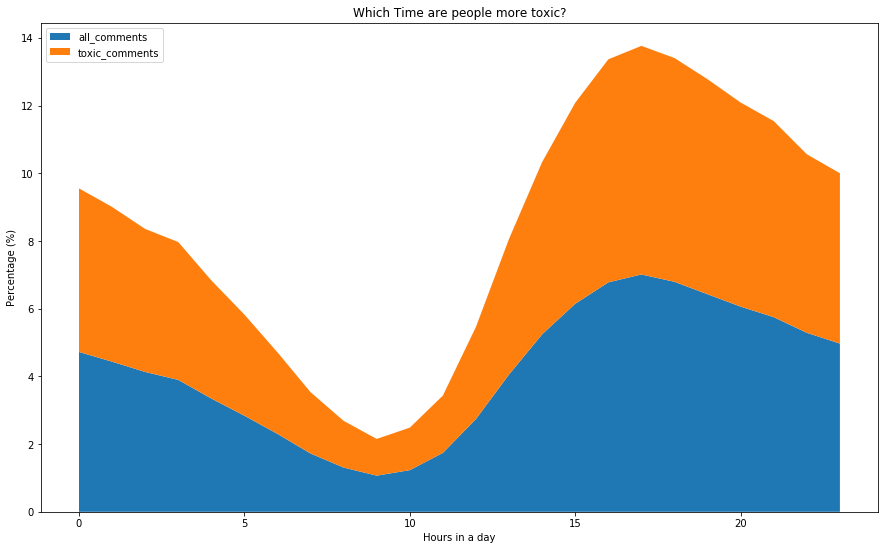

In [44]:
plt.figure(figsize=(15, 9))
y1 = comments_hour_check['all_comments'].values*100
y2 = comments_hour_check['toxic_comments'].values*100
x = range(len(y1))

plt.stackplot(x, y1, y2, labels=['all_comments', 'toxic_comments'])
plt.legend(loc='upper left')
plt.xlabel('Hours in a day')
plt.ylabel('Percentage (%)')
plt.title('Which Time are people more toxic?')
plt.show()

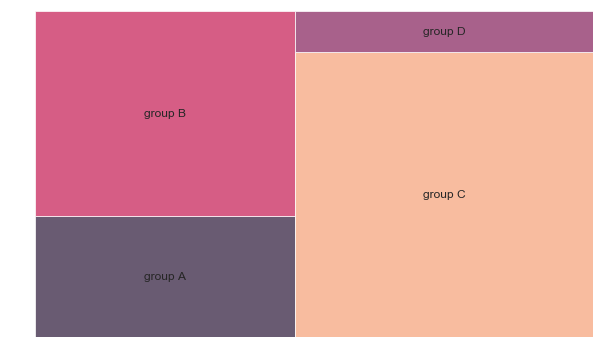

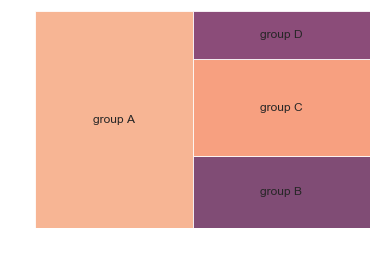

In [62]:
import squarify    # pip install squarify (algorithm for treemap)

plt.figure(figsize=(10, 6))
# If you have 2 lists
squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], alpha=.7 )
plt.axis('off')
plt.show()
 
# If you have a data frame?
import pandas as pd
df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

In [63]:
census = pd.read_csv('./census/State.csv')

In [64]:
census.head()

,GEONAME,LNTITLE,GEOID,LNNUMBER,TOT_EST,TOT_MOE,ADU_EST,ADU_MOE,CIT_EST,CIT_MOE,CVAP_EST,CVAP_MOE
0,Alabama,Total,04000US01,1,4850770,0,3748090,436,4744555,3160,3651915,2853
1,Alabama,Not Hispanic or Latino,04000US01,2,4652395,234,3627240,444,4606390,1938,3585900,1847
2,Alabama,American Indian or Alaska Native Alone,04000US01,3,22605,1039,18265,812,22560,1019,18220,799
3,Alabama,Asian Alone,04000US01,4,63730,1264,48885,774,40295,1415,28160,1055
4,Alabama,Black or African American Alone,04000US01,5,1284095,1940,959250,1034,1276885,2072,952790,1318


In [65]:
census['ratio'] = census['ADU_EST'] / census['TOT_EST']

In [85]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [86]:
census['STATE_ABV'] = census['GEONAME'].apply(lambda x: us_state_abbrev[x])

In [99]:
census_aggregated = census.groupby('STATE_ABV')[['TOT_EST', 'ADU_EST']].sum()

In [100]:
census_aggregated['RATIO'] = census_aggregated['ADU_EST'] / census_aggregated['TOT_EST']

In [103]:
census_aggregated = census_aggregated.reset_index()

In [113]:
data = dict(type='choropleth',
            colorscale = 'RdBu',
            locations = census_aggregated['STATE_ABV'],
            z = census_aggregated['RATIO'],
            locationmode = 'USA-states',
            text = census_aggregated['ADU_EST'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Voting-Age Population"}
            ) 

In [114]:
layout = dict(title = 'Percentage of Voting-Age Population by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [115]:
choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)

In [85]:
us_cities = pd.read_csv('./census/uscities.csv')

In [86]:
us_cities = us_cities.sort_values(by='population', ascending=False).head(20)

In [87]:
import numpy as np
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 400, 50)]

In [89]:
us_cities['text'] = us_cities['city'] + '<br>Population ' + (us_cities['population']/1e6).astype(str)+' million'
# limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

for i in range(len(us_cities)):
#     df_sub = us_cities[lim[0]:lim[1]]
    city = go.Scattergeo(
        locationmode = 'USA-states',
        lon = us_cities['lng'],
        lat = us_cities['lat'],
        text = us_cities['text'],
        marker = go.scattergeo.Marker(
            size = us_cities['population']/scale,
            color = c[i],
            line = go.scattergeo.marker.Line(
                width=0.5, color='rgb(40,40,40)'
            ),
            sizemode = 'area'
        ),
        name = us_cities.iloc[i].city)
    cities.append(city)

layout = go.Layout(
        title = go.layout.Title(
            text = '2019 US city populations'
        ),
        showlegend = True,
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(
                type='albers usa'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = go.Figure(data=cities, layout=layout)
py.iplot(fig, filename='d3-bubble-map-populations')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

